In [ ]:
pip install pip -U

In [ ]:
pip install pillow wordcloud -U

### Dataset

In [1]:
##SMSSpanCollection

### Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

### Import Dataset

In [3]:
df = pd.read_csv("SMSSpamCollection",sep = '\t', header = None, names=['label', 'text'])
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
df.loc[567,:]

label                                              ham
text     Oooh bed ridden ey? What are YOU thinking of?
Name: 567, dtype: object

### Data Preprocessing and visualization

In [5]:
## Input 
X = df['text']

## output
y = df['label']

In [6]:
y.value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

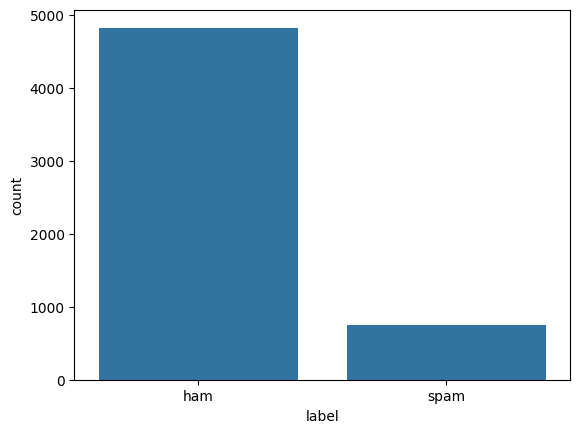

In [7]:
sns.countplot(x = y)

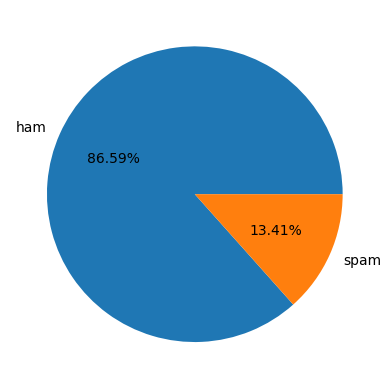

In [8]:
plt.pie(y.value_counts(), labels = y.value_counts().index,  autopct='%2.2f%%');

### Seperate spam and ham messages and merge them to get single strings

In [20]:
spam = X[y=='spam']
spam = " ".join(spam)

not_spam = X[y=='ham']
not_spam = " ".join(not_spam)

In [21]:
spam

'Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C\'s apply 08452810075over18\'s FreeMsg Hey there darling it\'s been 3 week\'s now and no word back! I\'d like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only. Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030 SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info URGENT! You have won a 1 week FREE membership in our £100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18 XXXMobileMovieClub: To use your credit, click the WAP link in the next txt message o

In [22]:
not_spam

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat... Ok lar... Joking wif u oni... U dun say so early hor... U c already then say... Nah I don\'t think he goes to usf, he lives around here though Even my brother is not like to speak with me. They treat me like aids patent. As per your request \'Melle Melle (Oru Minnaminunginte Nurungu Vettam)\' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune I\'m gonna be home soon and i don\'t want to talk about this stuff anymore tonight, k? I\'ve cried enough today. I\'ve been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times. I HAVE A DATE ON SUNDAY WITH WILL!! Oh k...i\'m watching here:) Eh u remember how 2 spell his name... Yes i did. He v naughty make until i v wet. Fine if that\x92s the way u feel. That\x92s th

In [23]:
from wordcloud import WordCloud

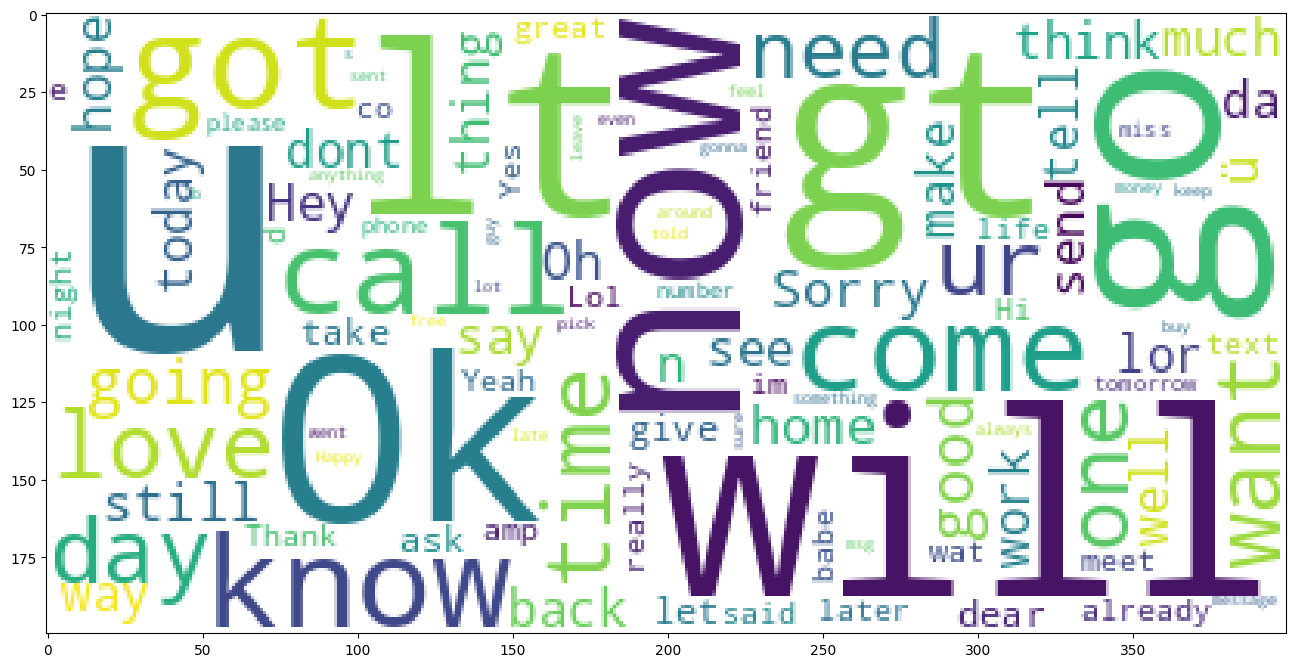

In [40]:
wc_notspam = WordCloud(background_color='white', max_words=100).generate(not_spam)

plt.figure(figsize= (16,9))
plt.imshow(wc_notspam)

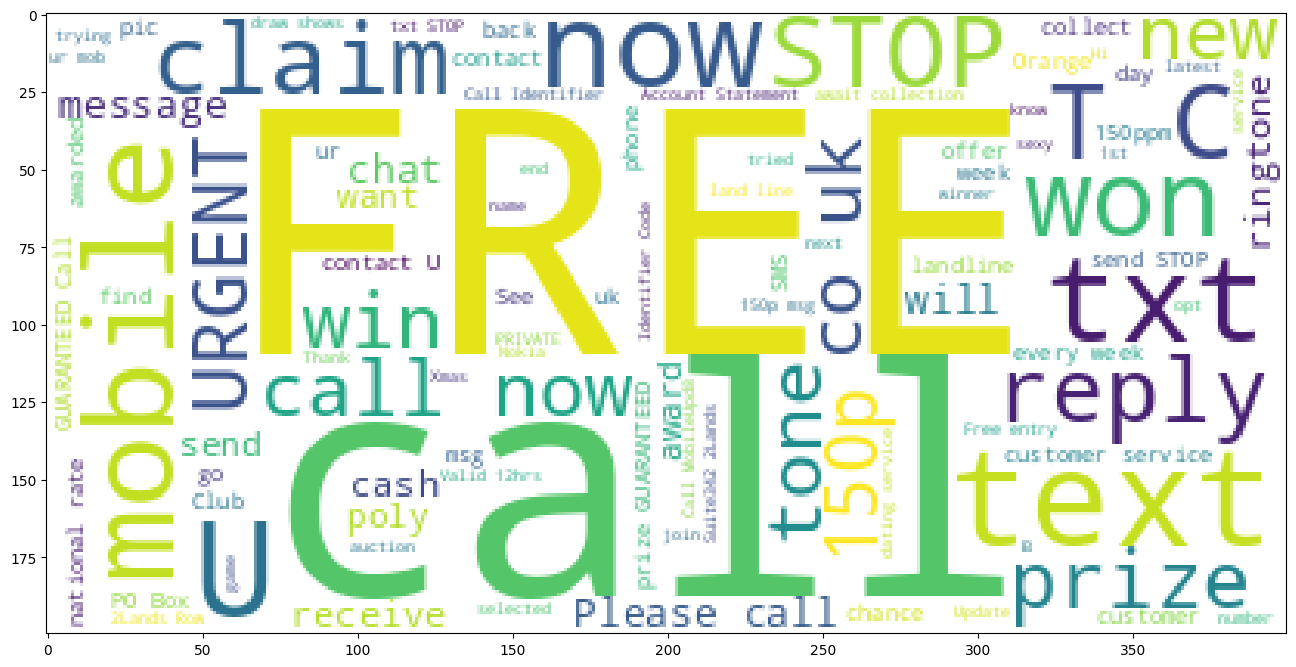

In [41]:
wc_spam = WordCloud(background_color='white', max_words=100).generate(spam)

plt.figure(figsize= (16,9))
plt.imshow(wc_spam)

In [42]:
wc_spam.words_

{'FREE': 1.0,
 'call': 0.875,
 'text': 0.63,
 'U': 0.59,
 'txt': 0.5,
 'now': 0.5,
 'mobile': 0.5,
 'won': 0.365,
 'T C': 0.33,
 'claim': 0.315,
 'STOP': 0.315,
 'reply': 0.31,
 'prize': 0.305,
 'call now': 0.29,
 'URGENT': 0.28,
 'win': 0.27,
 'new': 0.27,
 'tone': 0.265,
 'co uk': 0.245,
 '150p': 0.24,
 'Please call': 0.23,
 'will': 0.22,
 'message': 0.21,
 'chat': 0.2,
 'ringtone': 0.18,
 'cash': 0.17,
 'receive': 0.165,
 'send': 0.145,
 'award': 0.14,
 'want': 0.135,
 'poly': 0.135,
 'customer service': 0.135,
 'PO Box': 0.135,
 'contact U': 0.135,
 'msg': 0.125,
 'go': 0.125,
 'SMS': 0.12,
 'landline': 0.12,
 '150ppm': 0.115,
 'find': 0.115,
 'collect': 0.115,
 'phone': 0.115,
 'GUARANTEED Call': 0.115,
 'day': 0.11,
 'uk': 0.11,
 'offer': 0.11,
 'chance': 0.11,
 'prize GUARANTEED': 0.11,
 'contact': 0.105,
 'pic': 0.105,
 'week': 0.1,
 'customer': 0.1,
 'send STOP': 0.1,
 'national rate': 0.1,
 'back': 0.095,
 'ur': 0.095,
 'awarded': 0.095,
 'See': 0.095,
 'Club': 0.095,
 'Orang

### Data Preparation and vectorization

In [44]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [50]:
## Example
sent = 'Hello friends! How are you? I like Python Programming.'

In [62]:
## 1. Tokenize the text
tokens1 = word_tokenize(sent)
tokens1

['Hello',
 'friends',
 '!',
 'How',
 'are',
 'you',
 '?',
 'I',
 'like',
 'Python',
 'Programming',
 '.']

In [63]:
## 2. Remove punctualtions
tokens2 = [token for token in tokens1 if token.isalnum()]
tokens2

['Hello', 'friends', 'How', 'are', 'you', 'I', 'like', 'Python', 'Programming']

In [64]:
## 3. Remove stopwords
swords = stopwords.words('english')

tokens3 = [token for token in tokens2 if token.lower() not in swords]

tokens3

['Hello', 'friends', 'like', 'Python', 'Programming']

In [68]:
## 4. Stemming
ps = PorterStemmer()

tokens4 = [ps.stem(token) for token in tokens3]

tokens4

['hello', 'friend', 'like', 'python', 'program']

In [71]:
## Analyzer function
def clean_text(sent):
    
    tokens1 = word_tokenize(sent) ## tokenize

    tokens2 = [token for token in tokens1 if token.isalnum()] ## remove punctuations
    
    swords = stopwords.words('english')

    tokens3 = [token for token in tokens2 if token.lower() not in swords] ## Remove stopwords
    
    ps = PorterStemmer()

    tokens4 = [ps.stem(token) for token in tokens3] ## stemming
    
    return tokens4
    

In [72]:
tokens = clean_text(sent)
tokens

['hello', 'friend', 'like', 'python', 'program']

In [73]:
tokens = clean_text("It was expected result on the occasion.")
tokens

['expect', 'result', 'occas']

In [76]:
clean_text(X[400])

['hmmm',
 'k',
 'want',
 'chang',
 'field',
 'quickli',
 'da',
 'wan',
 'na',
 'get',
 'system',
 'administr',
 'network',
 'administr']

In [79]:
X.apply(clean_text)

0       [go, jurong, point, crazi, avail, bugi, n, gre...
1                            [ok, lar, joke, wif, u, oni]
2       [free, entri, 2, wkli, comp, win, fa, cup, fin...
3           [u, dun, say, earli, hor, u, c, alreadi, say]
4            [nah, think, goe, usf, live, around, though]
                              ...                        
5567    [2nd, time, tri, 2, contact, u, pound, prize, ...
5568                       [ü, b, go, esplanad, fr, home]
5569                                [piti, mood, suggest]
5570    [guy, bitch, act, like, interest, buy, someth,...
5571                                   [rofl, true, name]
Name: text, Length: 5572, dtype: object

### TF*IDF Vectorizer

In [80]:
### import the class.
from sklearn.feature_extraction.text import TfidfVectorizer

In [83]:
## Create object of the class
tfidf = TfidfVectorizer(analyzer = clean_text)

x_new = tfidf.fit_transform(X)

x_new

<5572x6854 sparse matrix of type '<class 'numpy.float64'>'
	with 47556 stored elements in Compressed Sparse Row format>

In [175]:
type(X)

pandas.core.series.Series

### Cross validation

In [84]:
## import function
from sklearn.model_selection import train_test_split

In [108]:
### seperate the training and testing data
X_train, X_test, y_train, y_test = train_test_split(x_new, y, random_state = 0, stratify = y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4179, 6854), (1393, 6854), (4179,), (1393,))

### Building the machine learning classifiaction model

In [109]:
### import class
from sklearn.svm import SVC

### RBF kernel

In [146]:
## Craete sigmoid
svm = SVC(kernel = 'linear', random_state = 0)

In [147]:
%%time
svm.fit(X_train, y_train)

CPU times: total: 438 ms
Wall time: 444 ms


SVC(kernel='linear', random_state=0)

## Performance Evaluation

In [148]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [149]:
y_pred = svm.predict(X_test)
y_pred

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [150]:
print("Accuracy :", accuracy_score(y_test, y_pred))
print( confusion_matrix(y_test, y_pred))

Accuracy : 0.9770279971284996
[[1203    3]
 [  29  158]]


In [151]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1206
        spam       0.98      0.84      0.91       187

    accuracy                           0.98      1393
   macro avg       0.98      0.92      0.95      1393
weighted avg       0.98      0.98      0.98      1393



In [145]:
## RBF -> 0.9676956209619526
## Linear -> 0.9770279971284996
## Polynomial -> 0.9174443646805456
## Sigmoid -> 0.9734386216798278

In [152]:
### Prediction on unseen data

In [167]:
valid = pd.read_csv("sample.csv",sep = '\t', header= None) 
valid

,0
0,Ok lar i double check wif da hair dresser alre...
1,"As a valued customer, I am pleased to advise y..."
2,"Today is ""song dedicated day.."" Which song wil..."


In [179]:
X_valid = tfidf.transform(valid[0])

In [180]:
y_pred = svm.predict(X_valid)
y_pred

array(['ham', 'spam', 'ham'], dtype=object)

In [184]:
f = open("sample.csv")
text = f.readlines()
svm.predict(tfidf.transform(text))

array(['ham', 'spam', 'ham'], dtype=object)